In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.linewidth'] = 2

In [9]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})
plt.rcParams['figure.dpi'] = 600
C = ['#2E86C1', '#85C1E9', '#1B4F72']

In [6]:
df = pd.read_csv('../data/phonons_per_gain.csv', index_col=None)
df.head()

,avg_phonons,g_fb,G_z,G_p,eta
0,2.091127,50126.640589,497.452782,50086.506040,0.3
1,1.195036,100253.281178,3475.997312,100042.451188,0.3
2,1.278146,150379.921767,8877.186835,149779.186597,0.3
3,0.760825,200506.562356,16610.828590,199216.009950,0.3
4,0.749565,250633.202945,26560.761994,248282.988013,0.3


In [7]:
df['g_fb_int'] = df['g_fb'].astype(int)
df['eta_int'] = (10*df['eta'].values).astype(int)
means_plot = df.groupby(['g_fb_int', 'eta_int'], as_index=False).mean()
stds_plot = df.groupby(['g_fb_int', 'eta_int'], as_index=False).std()
gains_plot = df.groupby(['g_fb_int'],as_index=False).mean()['g_fb'].values

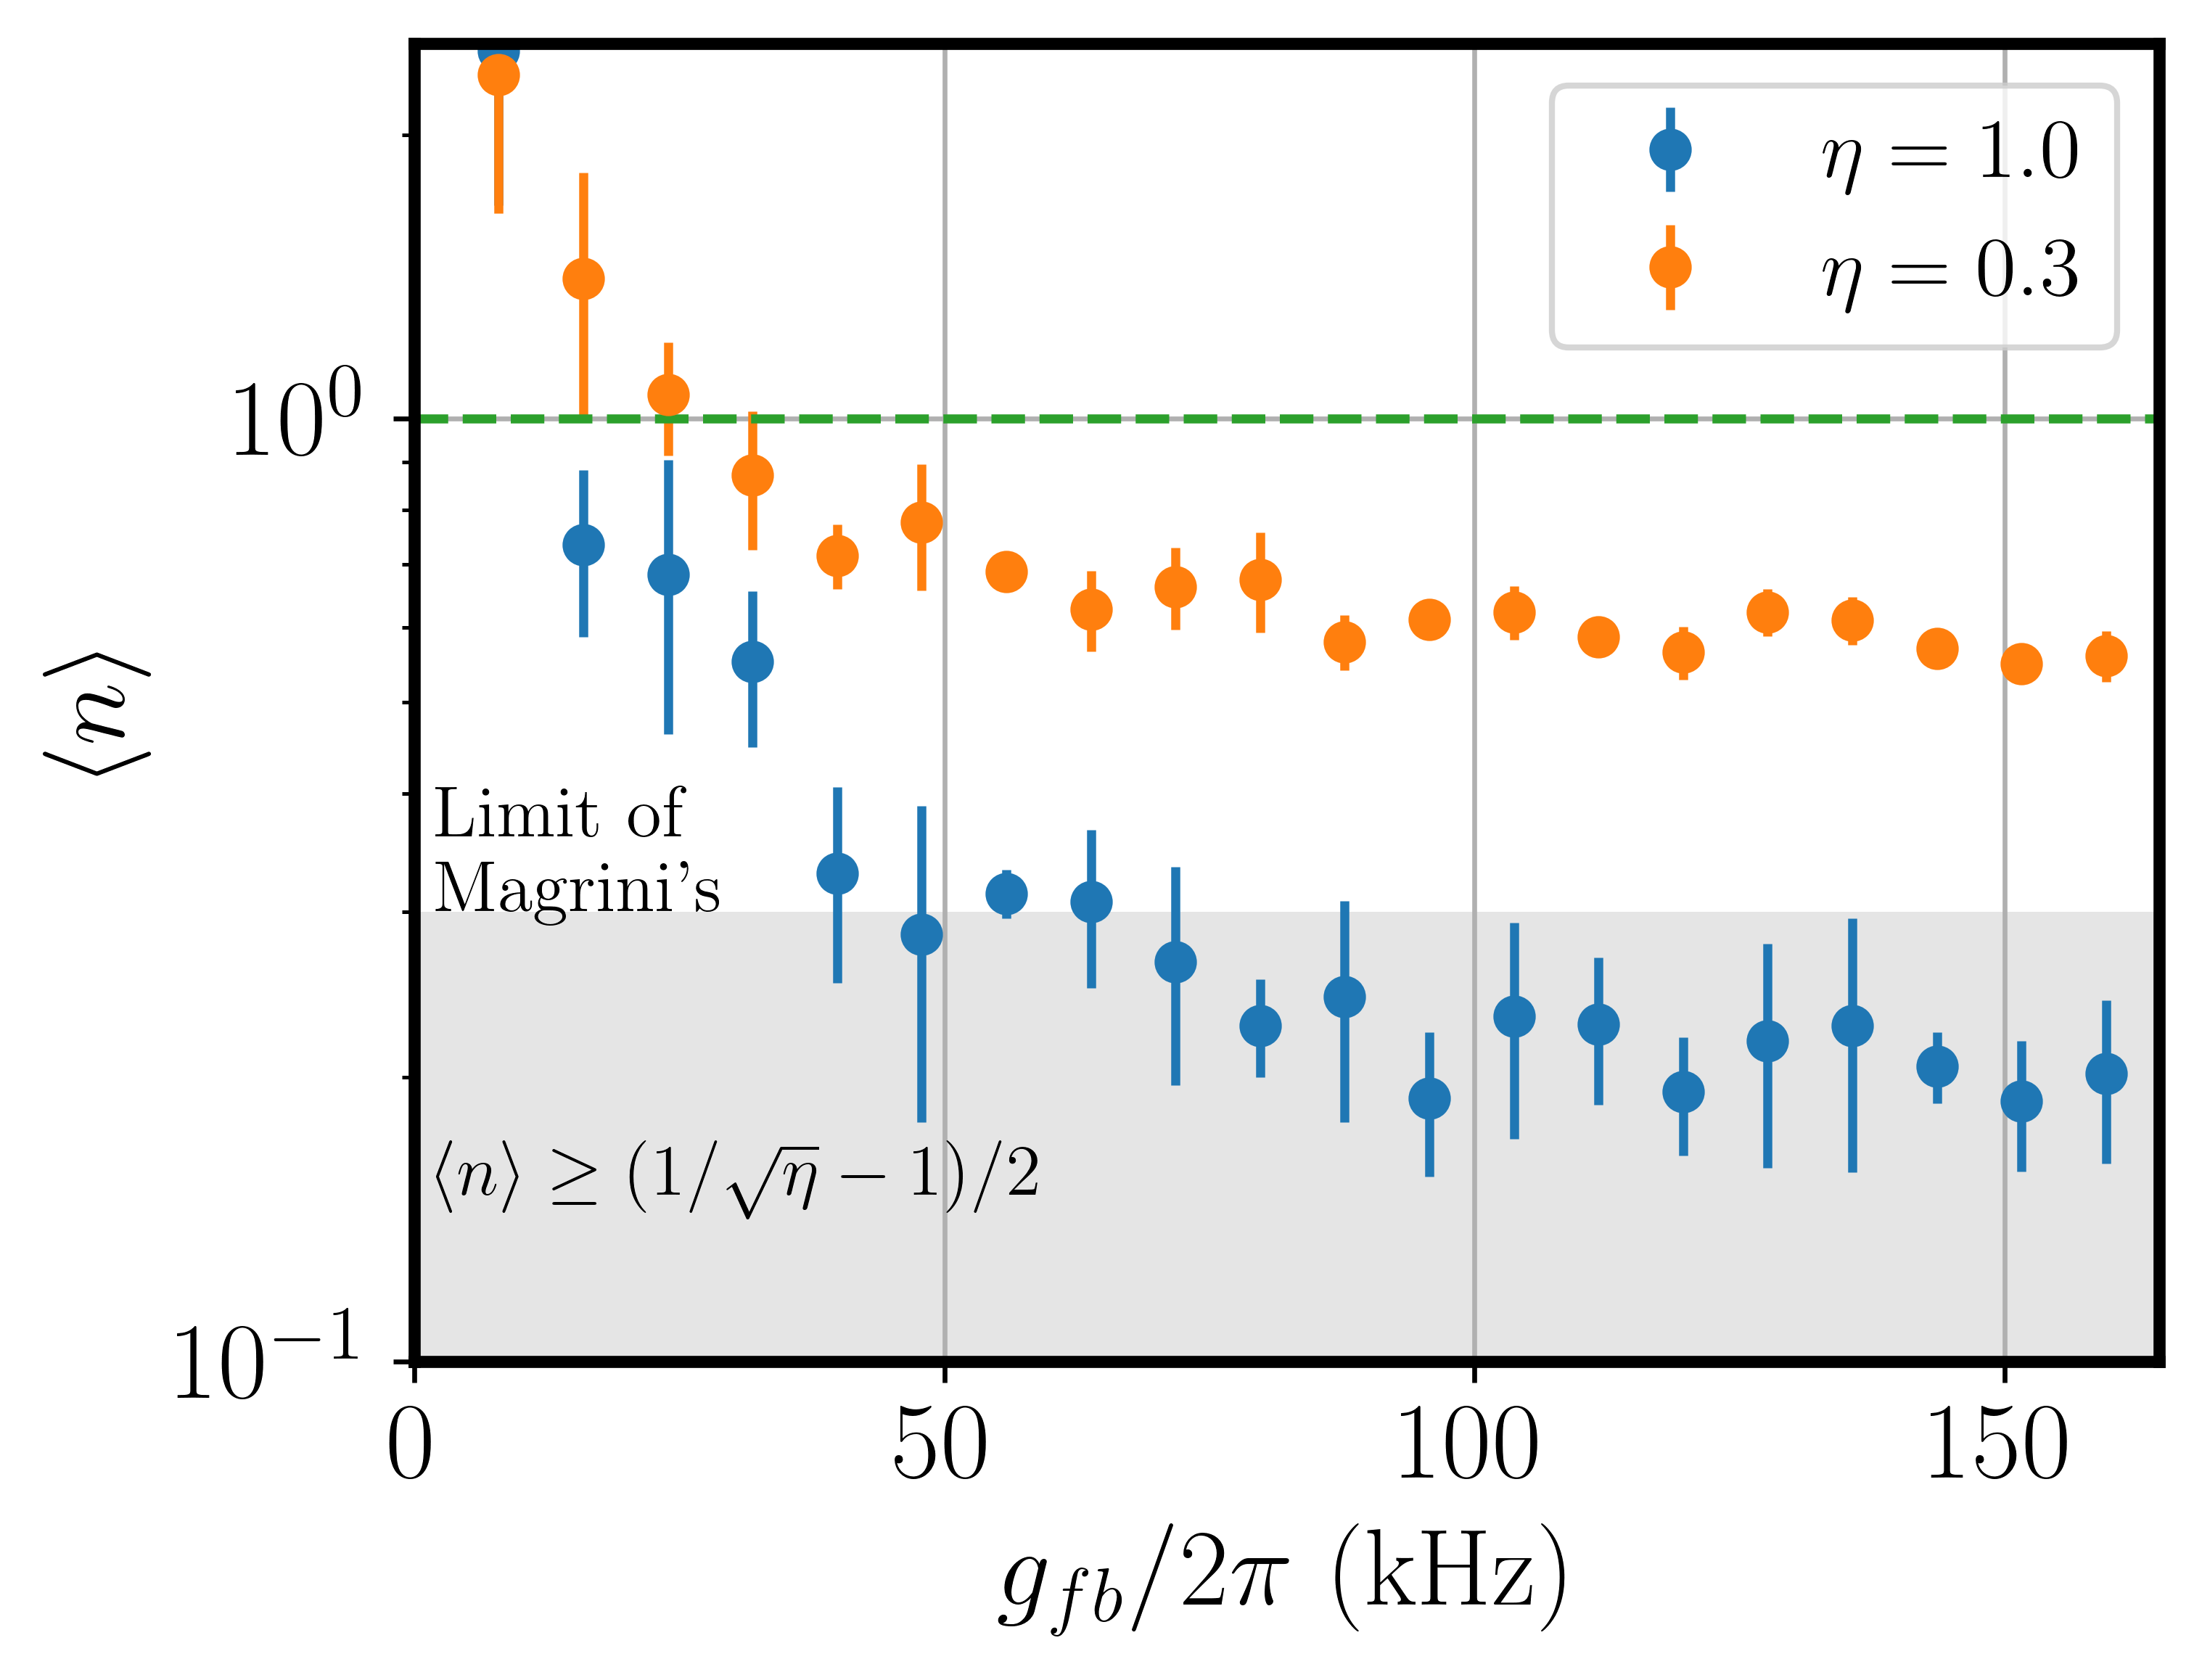

In [28]:
fig = plt.figure(figsize=(5.4, 4.2))
plt.errorbar(gains_plot/(2*1e3*np.pi), means_plot[means_plot['eta_int']==10]['avg_phonons'], 
             stds_plot[stds_plot['eta_int']==10]['avg_phonons'], fmt='o')
plt.errorbar(gains_plot/(2*1e3*np.pi), means_plot[means_plot['eta_int']==3]['avg_phonons'], 
             stds_plot[stds_plot['eta_int']==3]['avg_phonons'], fmt='o')
plt.grid()
plt.xlabel(r'$g_{fb}/2\pi$ (kHz)')
plt.ylabel(r'$\langle n \rangle$')
plt.yscale('log')
plt.legend([r'$\eta=1.0$', r'$\eta=0.3$'], loc = 'upper right', fontsize = 14)
plt.axhspan(1e-1, 0.3, facecolor='0.2', alpha=0.125, zorder=-100)
plt.xlim([0, 5+gains_plot[-1]/(2*1e3*np.pi)])
plt.plot([0,200], [1,1], '--')
plt.ylim([0.1,2.5])
plt.text(2, 0.3, 'Limit of \nMagrini\'s', fontsize=12)
plt.text(2, 0.15, r'$\langle n \rangle \geq (1/\sqrt{\eta}-1)/2$', fontsize=12)
plt.tight_layout()
plt.savefig(r'..\data\plot_numbers.pdf')
plt.show()
#plt.axvspan(2e6, 10e6, facecolor='0.2', alpha=0.175, zorder=-100)
#plt.xlim([1.1*gains_pert.min(), 1.1*gains_pert.max()])
#plt.ylim([-6e3, 6e3])